# Data Science – Xtern Work Sample Assessment

### Situation:

In order to make the Xtern program the best summer internship program for the participants, the data science team is focusing its efforts on picking out the most convenient coworking space from a list of 5 potential places and providing a sample 10-week activities plan. A sample 10-week activities plan includes a weekly group dinner at different restaurants around Indianapolis, a biweekly sport, music, gaming, and art event, one big conference or Ted Talk event. 

### Task:

Please look over the data.xlsx for Xtern housing location and 5 coworking spaces location. Utilize the open-source map API such as Google Map API, OpenStreetMap, AWS Map API to collect useful data around restaurants and event venue location. Use Google to find all the wonderful events that are happening in the Indianapolis area (Hint: EventBrite API). As an important member of the team, you get to come up with your own analysis and explain it! So try your best to dig out any useful information out of this data set. The sky's the limit! 🤓

### Deliverables:

1.	Clean and organize your data set then present the data as a table or data frame. 
2.	Cluster housing, restaurants, event, conference locations to pick out the most convenient coworking space. 
3.	Review the data and draw any conclusions you can find from the data set you gathered. 
4.	Present a sample 10-week activities plan with event date, event location and event detail. 
5.	Demonstrate your findings using data visualization tool and well written analysis.


## Read Data for Events

In [288]:
import pandas as pd

# Import data from csv file
eventSheet = pd.read_csv(r'C:\Users\Joshua\Desktop\events.csv')

# Print first 10 rows of data
eventSheet.head(10)

,event_id,event_name,category,city,start_date,start_time,end_time,longitude,latitude,min_ticket_price,max_ticket_price
0,1,Startups Mentorship Program,Startups & Small Business,Indianapolis,5/14/2022,11:00,12:00,-86.109012,39.777450,30.0,75.0
1,2,[Free Masterclass] Google Analytics Beginners ...,Sales & Marketing,Indianapolis,5/10/2022,13:00,13:40,-86.161545,39.786708,0.0,0.0
2,3,[Free Masterclass] How to Write SEO Friendly G...,Sales & Marketing,Indianapolis,5/10/2022,13:00,13:40,-86.161545,39.786708,0.0,0.0
3,4,[Free Masterclass] Rank #1 on Google Maps & Ye...,Sales & Marketing,Indianapolis,5/10/2022,13:00,13:40,-86.161545,39.786708,0.0,0.0
4,5,Conquer Your Fear of Public Speaking -Indianap...,Career,Indianapolis,5/10/2022,18:00,19:30,-86.279873,39.736023,0.0,0.0
5,6,[Free Masterclass] Get More Targeted Instagram...,Sales & Marketing,Indianapolis,5/10/2022,13:00,13:40,-86.161545,39.786708,0.0,0.0
6,7,Cyber Security Overview 1 Day Training in Indi...,Business & Professional,Indianapolis,5/20/2022,9:00,17:00,-86.100774,39.924988,545.0,795.0
7,8,Startups Fund Raising Program,Startups & Small Business,Indianapolis,5/14/2022,12:00,13:00,-86.170089,39.779477,30.0,75.0
8,9,Become a Home-Based Travel Advisor - NO EXPERI...,Travel,Indianapolis,5/16/2022,20:00,20:30,-86.231495,39.922868,0.0,0.0
9,10,"Sales, Marketing, Customer Acquisition & Reten...",Sales & Marketing,Indianapolis,5/11/2022,11:00,12:00,-86.158068,39.768403,35.0,75.0


## Read Data for Restaurants

In [61]:
# Import data from csv file
restaurantSheet = pd.read_csv(r'C:\Users\Joshua\Desktop\restaurants.csv')

# Print first 10 rows of data
restaurantSheet.head(10)

,restaurant_id,name,longitude,latitude,cuisine,vegan,vegetarian
0,1,Indianapolis 500 Grill,-86.297792,39.715038,burger,NaN,NaN
1,2,Hard Rock Cafe,-86.157904,39.765771,american,no,yes
2,3,McDonald's,-86.007657,39.717214,burger,NaN,NaN
3,4,Five Guys,-86.325548,39.764227,burger,NaN,NaN
4,5,Outback Steakhouse,-86.324871,39.764419,american;steak,NaN,NaN
5,6,McAlister's Deli,-86.324608,39.764427,sandwich,NaN,NaN
6,7,Panera Bread,-86.325807,39.763227,sandwich;bakery,NaN,NaN
7,8,Wings Etc,-86.325796,39.762840,NaN,NaN,NaN
8,9,Ruby Tuesday,-86.138791,39.651172,american,NaN,NaN
9,10,The Cheesecake Factory,-86.108388,39.913584,american,NaN,yes


## Read Data for Workspaces

In [223]:
# Import data from csv file
workspacesSheet = pd.read_csv(r'C:\Users\Joshua\Desktop\workspaces.csv')

# Print all rows of data
workspacesSheet.head(5)

,id,locationName,type,longitude,latitude
0,1,The Speak Easy,Coworking,-86.141327,39.849047
1,2,zWORKS,Coworking,-86.262505,39.951361
2,3,Launch Fishers,Coworking,-86.008963,39.967048
3,4,Industrious Mass Ave,Coworking,-86.154009,39.771446
4,5,Launch Indy,Coworking,-86.158225,39.759710


## Map of Events and Restaurants

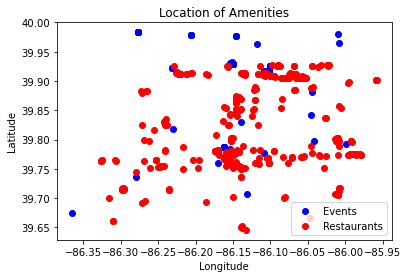

In [191]:
from matplotlib import pyplot as plt

# Plot events and restaurant data on same plot
plt.scatter(x="longitude", y="latitude", data=eventSheet, c='blue', label="Events")
plt.scatter(x="longitude", y="latitude", data=restaurantSheet, c='red', label="Restaurants")
plt.title("Location of Amenities")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

#### Notice there are several clusters present in this graph. The largest one being near the middle, which likely represents downtown Indianapolis. We can now analyze these clusters.

## Cluster Analysis

#### To make the data of each table easier to cluster, I will create a single array of coordinates of restaurants and events.

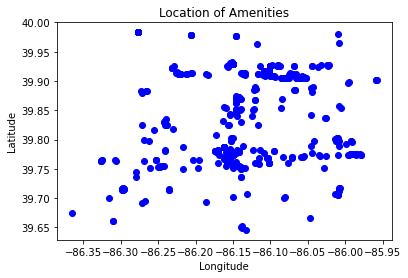

In [192]:
import numpy as np

# List to hold coordinate values
eventsNp = eventSheet[["longitude","latitude"]].to_numpy()
restaurantNp = restaurantSheet[["longitude","latitude"]].to_numpy()

allNp = np.concatenate((eventsNp, restaurantNp))


# Create plot and print
plt.scatter(*zip(*allNp), c='blue')
plt.title("Location of Amenities")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

#### I will add housing location and workspaces after I cluster data to make a cleaner and more precise analysis of the plot.

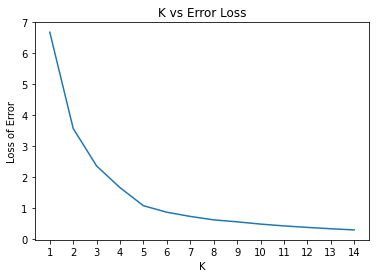

In [137]:
plt.plot(range(1,15), lossOfError)
plt.xticks(np.arange(1,15, step=1))
plt.title("K vs Error Loss")
plt.xlabel("K") 
plt.ylabel("Loss of Error")
plt.show()

#### Note that the loss of error smoothens out at around 6, so I will set the number of clusters to 6.

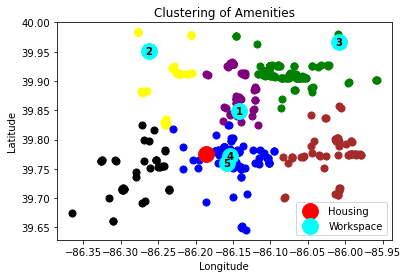

In [220]:
kmeans = KMeans(n_clusters = 6, max_iter = 1000)
kmeans.fit(allNp)

y_kmeans = kmeans.fit_predict(allNp)

# Plot cluster
plt.scatter(allNp[y_kmeans ==0,0], allNp[y_kmeans == 0,1], s=50, c='yellow')
plt.scatter(allNp[y_kmeans ==1,0], allNp[y_kmeans == 1,1], s=50, c='blue')
plt.scatter(allNp[y_kmeans ==2,0], allNp[y_kmeans == 2,1], s=50, c='green')
plt.scatter(allNp[y_kmeans ==3,0], allNp[y_kmeans == 3,1], s=50, c='black')
plt.scatter(allNp[y_kmeans ==4,0], allNp[y_kmeans == 4,1], s=50, c='brown')
plt.scatter(allNp[y_kmeans ==5,0], allNp[y_kmeans == 5,1], s=50, c='purple')

plt.title("Clustering of Amenities")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Coordinate for housing
plt.scatter(x=-86.186586, y=39.775042, c='red', s=250, label='Housing')

workspaceLon = []
workspaceLat = []

for i, row in workspacesSheet.iterrows():
    valueLon = workspacesSheet.loc[i, 'longitude']
    valueLat = workspacesSheet.loc[i, 'latitude']
    workspaceLon.append(valueLon)
    workspaceLat.append(valueLat)

annotations = [1, 2, 3, 4, 5]
plt.scatter(x=workspaceLon,y=workspaceLat,s=250,color="cyan", label='Workspace')

# Annotate
for i, label in enumerate(annotations):
    plt.annotate(label, (workspaceLon[i], workspaceLat[i]), horizontalalignment='center',
                 verticalalignment='center', size=10, weight='bold', color='black')

plt.legend()
plt.show()

#### Here is the final clustering with large points for housing and workspaces. There are two coworking spaces that are close to the IUPUI housing and are in a highly dense spot for restaurants and events. Those are coworking spaces 4 and 5. As I mentioned ealier, this middle cluster is downtown Indianapolis, so it makes sense that there are a lot of restaurants and events, and that it is close to IUPUI. Now these two coworking spots are ideal, however it is also likely that they are the most expensive.

## Final Thoughts on Workspaces



In [224]:
workspacesSheet.head(5)

,id,locationName,type,longitude,latitude
0,1,The Speak Easy,Coworking,-86.141327,39.849047
1,2,zWORKS,Coworking,-86.262505,39.951361
2,3,Launch Fishers,Coworking,-86.008963,39.967048
3,4,Industrious Mass Ave,Coworking,-86.154009,39.771446
4,5,Launch Indy,Coworking,-86.158225,39.759710


#### Recall the table for the coworking spaces. Workspace 4 and 5 correlates with Industrious Mass Ave and Launch Indy, respectively. Again these two coworking spaces would be the ideal workspace for the Interns. Some reccomondations for chosing one of these spots is to look into the rent, parking options, and size of the workspace. Workspace 1, i.e. The Speak Easy workspace, is located in the Meridian-Kessler area, just north of the Indiana State fair grounds. This workspace is still fairly close the intern housing (about 15 minutes), and considering this will probably be a more affordable option, I would recommend The Speak Easy workspace as the more "realistic" option.   

## Events Analysis

In [276]:
housingLon = -86.186586
housingLat = 39.775042

# Minimum ticket price less than $200 and within 0.075 degrees lat and lon. Roughly within 15-20 minutes away.
eventSheet[(eventSheet['min_ticket_price'] < 200) & (abs(housingLon - eventSheet['longitude']) < .075
            ) & (abs(housingLat - eventSheet['latitude']) < .075)]

,event_id,event_name,category,city,start_date,start_time,end_time,longitude,latitude,min_ticket_price,max_ticket_price
1,2,[Free Masterclass] Google Analytics Beginners ...,Sales & Marketing,Indianapolis,5/10/2022,13:00,13:40,-86.161545,39.786708,0.0,0.0
2,3,[Free Masterclass] How to Write SEO Friendly G...,Sales & Marketing,Indianapolis,5/10/2022,13:00,13:40,-86.161545,39.786708,0.0,0.0
3,4,[Free Masterclass] Rank #1 on Google Maps & Ye...,Sales & Marketing,Indianapolis,5/10/2022,13:00,13:40,-86.161545,39.786708,0.0,0.0
5,6,[Free Masterclass] Get More Targeted Instagram...,Sales & Marketing,Indianapolis,5/10/2022,13:00,13:40,-86.161545,39.786708,0.0,0.0
7,8,Startups Fund Raising Program,Startups & Small Business,Indianapolis,5/14/2022,12:00,13:00,-86.170089,39.779477,30.0,75.0
9,10,"Sales, Marketing, Customer Acquisition & Reten...",Sales & Marketing,Indianapolis,5/11/2022,11:00,12:00,-86.158068,39.768403,35.0,75.0
10,11,[Free Masterclass] SEO Link Building Strategie...,Sales & Marketing,Indianapolis,5/10/2022,13:00,13:40,-86.161545,39.786708,0.0,0.0
11,12,[Free Masterclass] Google AdWords Tutorial & W...,Sales & Marketing,Indianapolis,5/10/2022,13:00,13:40,-86.161545,39.786708,0.0,0.0
16,17,#JobsOffice Virtual Job Fair / Career Expo Eve...,Career,Indianapolis,6/3/2022,11:00,14:00,-86.157371,39.771343,0.0,0.0
19,20,Love Your Relationship Again - Painlessly - In...,Reunion,Indianapolis,5/10/2022,13:00,14:00,-86.158068,39.768403,0.0,0.0


#### Here I have queried the events table to only show events that have the minimum ticket value less than 200 USD, and are within a certain radius (approx. less than a 20 minute drive from IUPUI housing). This will give me a better idea of what events I could pick for the 5 bi-weekly events. Note, the conference I am choosing has a starting price of 300 USD so it will not apear on this list.

In [289]:
eventsChoices = [2, 122, 17, 184, 175]
chosenEvents = eventSheet[(eventSheet['event_id'].isin(eventsChoices))]
chosenEvents.sort_values(by=['start_date'])

,event_id,event_name,category,city,start_date,start_time,end_time,longitude,latitude,min_ticket_price,max_ticket_price
1,2,[Free Masterclass] Google Analytics Beginners ...,Sales & Marketing,Indianapolis,5/10/2022,13:00,13:40,-86.161545,39.786708,0.0,0.0
118,122,#Data #FirstFridayFair Virtual Job Fair / Care...,Career,Indianapolis,5/26/2022,11:00,14:00,-86.157371,39.771343,0.0,0.0
16,17,#JobsOffice Virtual Job Fair / Career Expo Eve...,Career,Indianapolis,6/3/2022,11:00,14:00,-86.157371,39.771343,0.0,0.0
177,184,OutCare's 1st Annual Gala: A Night Out,Medical,Indianapolis,7/11/2022,18:30,23:59,-86.169984,39.759416,150.0,1800.0
168,175,Change Management Classroom Training in Indian...,Career,"Indianapolis, IN",7/22/2022,9:00,17:00,-86.276799,39.983189,175.0,899.0


In [285]:
eventSheet[(eventSheet['event_id'] == 186)]

,event_id,event_name,category,city,start_date,start_time,end_time,longitude,latitude,min_ticket_price,max_ticket_price
179,186,Moving Forward with Courage and Compassion�,Business & Professional,Indianapolis,6/15/2022,8:00,4:00,-86.0091,39.96505,300.0,1200.0


#### The first five events are regular events all a week or two apart from the next one. My events dataset only allowed for so many choices, and to keep it bi-weekly, I was able to eliminate a lot of options. Note that the min ticket price is below 200 USB (some being free), and the location can be obtained easily from the Latitude/Longitude. The conference I chose starts on June 15th and actually runs till the 16th. The min ticket price is 300 USD for that conference. No conference in my data set was cheaper than 200 USB.

## Restaurants Analysis

#### To make sure to consider those interns who may be vegan or vegetarian, I will only consider restaurants that offer both options. I will also only consider those restaurants that are within a certain radius. Again no more than approx. a 20 minute drive.

In [264]:
restaurantSheet[(restaurantSheet['vegan'] == 'yes') & (restaurantSheet['vegetarian'] == 'yes')
               & (abs(housingLon - restaurantSheet['longitude']) < .075) & (abs(housingLat - 
                                                                                restaurantSheet['latitude']) < .075)]

,restaurant_id,name,longitude,latitude,cuisine,vegan,vegetarian
62,63,Yats,-86.142332,39.779414,cajun,yes,yes
108,109,Chipotle,-86.157771,39.767246,mexican,yes,yes
109,110,Qdoba,-86.157898,39.767484,mexican,yes,yes
110,111,Jimmy John's,-86.157923,39.767293,sandwich,yes,yes
113,114,Bru Burger Bar,-86.152097,39.773288,burger,yes,yes
116,117,The Eagle,-86.153981,39.771733,fried_chicken;southern,yes,yes
122,123,Potbelly's,-86.157200,39.768272,sandwich,yes,yes
139,140,Au Bon Pain,-86.158249,39.767857,sandwich,yes,yes
141,142,Soupremacy,-86.157028,39.768362,soup,yes,yes
177,178,Einstein Bros. Bagels,-86.168232,39.773882,bagel,yes,yes


#### Now considering this queried table. I will only choose one mexican cuisine and one sandwich cuisine. Furthermore I will eliminate Einstein Bros. Bagels and Jimmy John's from consideration. This leaves us with 10 restaurants, thus here are my choices for the weekly group dinner.

In [270]:
restaurantChoices = [63, 109, 114, 117, 140, 142, 181, 182, 187, 276]
restaurantSheet[(restaurantSheet['restaurant_id'].isin(restaurantChoices))]

,restaurant_id,name,longitude,latitude,cuisine,vegan,vegetarian
62,63,Yats,-86.142332,39.779414,cajun,yes,yes
108,109,Chipotle,-86.157771,39.767246,mexican,yes,yes
113,114,Bru Burger Bar,-86.152097,39.773288,burger,yes,yes
116,117,The Eagle,-86.153981,39.771733,fried_chicken;southern,yes,yes
139,140,Au Bon Pain,-86.158249,39.767857,sandwich,yes,yes
141,142,Soupremacy,-86.157028,39.768362,soup,yes,yes
180,181,Axum,-86.155697,39.778657,ethiopian,yes,yes
181,182,Sultana Cafe & Hookah Bar,-86.144460,39.782128,mediterranean,yes,yes
186,187,Elena Ruz Cuban Cuisine,-86.123944,39.839857,cuban,yes,yes
275,276,Ollies's Downtown,-86.159707,39.778610,american,yes,yes


#### Each Friday, the Interns will go to dinner at one of these restaurants. There are 10 weeks, thus 10 restaurants. The order doesn't matter too much, but to keep it simple, the first Friday will be at Yats, the second at Chipotle, and so on (down the list).

## Conclusion

#### In summary, the coworking spaces' Industrious Mass Ave and Launch Indy are the ideal spaces for interns because they are in a large cluster of Restaurants and event locations (likely the largest cluster, something to look more into another day) and are quite close to the IUPUI housing. However, since these workspaces are close to downtown, the price for rent may be over the company's budget. Thus, the Speak Easy coworking space may be a more viable option. 

#### There are many great events to choose from, but to keep cost at a reasonable level, I chose events that are under 200 USD per min ticket price. Most of them are actually free events. I also needed to consider drive time to each event, so I made a radius around the IUPUI housing to keep driving time within a reasonable amount (Roughly 10 miles or 15-20 mins).

#### For the group dinners, I needed to consider those who are vegan or vegetarian, and also needed to consider drive times. This in turn, led to a list of just over 10 places. I then tried to eliminate repeated cuisine categories, and places that don't serve dinner. My 10 week activites plan is therefore shown in each final analysis and in the next section. 10 group dinners, 5 sports, music, gaming, or art events, and one big conference.

## Organized 10-week Activities Plan

In [294]:
restaurantChoices = [63, 109, 114, 117, 140, 142, 181, 182, 187, 276]
restaurantSheet[(restaurantSheet['restaurant_id'].isin(restaurantChoices))]

,restaurant_id,name,longitude,latitude,cuisine,vegan,vegetarian
62,63,Yats,-86.142332,39.779414,cajun,yes,yes
108,109,Chipotle,-86.157771,39.767246,mexican,yes,yes
113,114,Bru Burger Bar,-86.152097,39.773288,burger,yes,yes
116,117,The Eagle,-86.153981,39.771733,fried_chicken;southern,yes,yes
139,140,Au Bon Pain,-86.158249,39.767857,sandwich,yes,yes
141,142,Soupremacy,-86.157028,39.768362,soup,yes,yes
180,181,Axum,-86.155697,39.778657,ethiopian,yes,yes
181,182,Sultana Cafe & Hookah Bar,-86.144460,39.782128,mediterranean,yes,yes
186,187,Elena Ruz Cuban Cuisine,-86.123944,39.839857,cuban,yes,yes
275,276,Ollies's Downtown,-86.159707,39.778610,american,yes,yes


In [295]:
eventsChoices = [2, 122, 17, 184, 175]
chosenEvents = eventSheet[(eventSheet['event_id'].isin(eventsChoices))]
chosenEvents.sort_values(by=['start_date'])

,event_id,event_name,category,city,start_date,start_time,end_time,longitude,latitude,min_ticket_price,max_ticket_price
1,2,[Free Masterclass] Google Analytics Beginners ...,Sales & Marketing,Indianapolis,5/10/2022,13:00,13:40,-86.161545,39.786708,0.0,0.0
118,122,#Data #FirstFridayFair Virtual Job Fair / Care...,Career,Indianapolis,5/26/2022,11:00,14:00,-86.157371,39.771343,0.0,0.0
16,17,#JobsOffice Virtual Job Fair / Career Expo Eve...,Career,Indianapolis,6/3/2022,11:00,14:00,-86.157371,39.771343,0.0,0.0
177,184,OutCare's 1st Annual Gala: A Night Out,Medical,Indianapolis,7/11/2022,18:30,23:59,-86.169984,39.759416,150.0,1800.0
168,175,Change Management Classroom Training in Indian...,Career,"Indianapolis, IN",7/22/2022,9:00,17:00,-86.276799,39.983189,175.0,899.0


In [296]:
eventSheet[(eventSheet['event_id'] == 186)]

,event_id,event_name,category,city,start_date,start_time,end_time,longitude,latitude,min_ticket_price,max_ticket_price
179,186,Moving Forward with Courage and Compassion�,Business & Professional,Indianapolis,6/15/2022,8:00,4:00,-86.0091,39.96505,300.0,1200.0
